In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
from scipy.misc import imread
from scipy.misc import imshow
import trackpy as tp
import math
import pims
from pims import Frame
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
Matr = TL
normal = np.max(Matr)
MatrixL = np.array(Matr)/normal
MatrixR = MatrixL.transpose()
MatrixR = MatrixR/np.max(MatrixR)
Linex = np.arange(0,384,1)
picL = 18333
picR = 18158
'''
PICL = pims.TiffStack('/Users/pchu/Documents/Git/Data/Shot119_Cam_{}.tif'.format(picL))
PICR = pims.TiffStack('/Users/pchu/Documents/Git/Data/Shot119_Cam_{}.tif'.format(picR))
picL0 = tp.bandpass(PICL[0],0,300,threshold=5,truncate=4)
picR0 = tp.bandpass(PICR[0],0,300,threshold=5,truncate=4)
#imsave("/Users/pchu/Documents/Git/Data/FrameL0.tif",picL0)
#imsave("/Users/pchu/Documents/Git/Data/FrameR0.tif",picR0)

zero = tp.bandpass(PICL[300],0,300,threshold=5,truncate=10)-pic0
zero[zero>0]=0
zero[zero<0]=0
a = zero
b = zero
for iv1 in range(30,400):
    b = zero
    for iv2 in range(0,10):
        iv = iv1*10+iv2
        vi = tp.bandpass(PICL[iv],0,300,threshold=5,truncate=10)-picL0
        vi[vi < 0] = 0
        vi = tp.bandpass(vi,0,300,threshold=5,truncate=10)
        vi = tp.bandpass(vi,0,300,threshold=10,truncate=10)
        b = b+vi
        a = a+vi
    #imsave("/Users/pchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_{}.tif".format(picL,iv1),b)
a = tp.bandpass(a,0,300,threshold=5,truncate=6)
imsave("/Users/pchu/Documents/Git/Data/FrameL_sum.tif",a)
a = zero
b = zero
for iv1 in range(30,400):
    b = zero
    for iv2 in range(0,10):
        iv = iv1*10+iv2
        vi = tp.bandpass(PICR[iv],0,300,threshold=5,truncate=10)-picR0
        vi[vi < 0] = 0
        vi = tp.bandpass(vi,0,300,threshold=5,truncate=10)
        vi = tp.bandpass(vi,0,300,threshold=10,truncate=10)
        b = b+vi
        a = a+vi
    #imsave("/Users/pchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_{}.tif".format(picR,iv1),b)a = tp.bandpass(a,0,300,threshold=5,truncate=6)
imsave("/Users/pchu/Documents/Git/Data/FrameR_sum.tif",a)

'''

'\nPICL = pims.TiffStack(\'/Users/pchu/Documents/Git/Data/Shot119_Cam_{}.tif\'.format(picL))\nPICR = pims.TiffStack(\'/Users/pchu/Documents/Git/Data/Shot119_Cam_{}.tif\'.format(picR))\npicL0 = tp.bandpass(PICL[0],0,300,threshold=5,truncate=4)\npicR0 = tp.bandpass(PICR[0],0,300,threshold=5,truncate=4)\n#imsave("/Users/pchu/Documents/Git/Data/FrameL0.tif",picL0)\n#imsave("/Users/pchu/Documents/Git/Data/FrameR0.tif",picR0)\n\nzero = tp.bandpass(PICL[300],0,300,threshold=5,truncate=10)-pic0\nzero[zero>0]=0\nzero[zero<0]=0\na = zero\nb = zero\nfor iv1 in range(30,400):\n    b = zero\n    for iv2 in range(0,10):\n        iv = iv1*10+iv2\n        vi = tp.bandpass(PICL[iv],0,300,threshold=5,truncate=10)-picL0\n        vi[vi < 0] = 0\n        vi = tp.bandpass(vi,0,300,threshold=5,truncate=10)\n        vi = tp.bandpass(vi,0,300,threshold=10,truncate=10)\n        b = b+vi\n        a = a+vi\n    #imsave("/Users/pchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_{}.tif".format(picL,iv1),b)

In [28]:
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
ParticlePair = pd.read_csv('PointPair_Frame_30.csv')
FrameL0 = imread('FrameL0.tif')
FrameR0 = imread('FrameR0.tif')
FrameL_sum = imread('FrameL_sum.tif')
FrameR_sum = imread('FrameR_sum.tif')

In [29]:
ParticlePair.head()

,Unnamed: 0,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,0,0,0,144.071562,234.976577,5.996396,150.799061,245.082456,17.017544
1,1,1,2,119.929841,210.967532,9.876623,114.025255,227.972158,18.839907
2,2,2,1,150.301683,204.941278,11.139896,144.978746,217.153285,19.120438
3,3,3,3,80.212815,198.857605,18.029126,102.913745,224.943445,25.961440
4,4,4,5,115.776426,214.905830,19.959641,90.479436,235.137427,28.929825


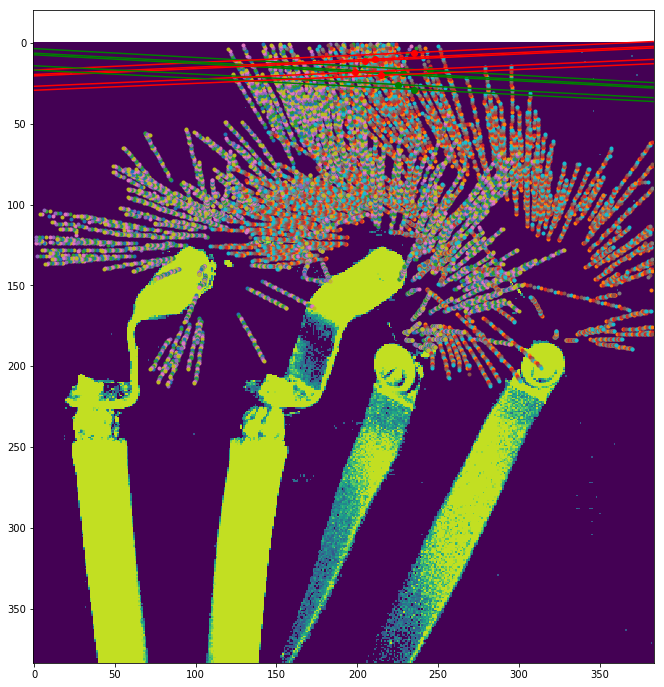

In [40]:
plt.figure(figsize=(12,12))
plt.imshow(FrameR0+FrameL0)
#for ii in range(1,len(FrameR),10):
for ii in range(30,100,2):
    fR= tp.locate(FrameR[ii], 3, minmass=5)
    plt.plot(fR['x'],fR['y'],'.')
    fL= tp.locate(FrameL[ii], 3, minmass=5)
    plt.plot(fL['x'],fL['y'],'.')
#for ij in range(0,len(ParticlePair)):
for ij in range(0,5):
    xR = ParticlePair['X_R'].iloc[ij]
    yR = ParticlePair['Y_R'].iloc[ij]
    xL = ParticlePair['X_L'].iloc[ij]
    yL = ParticlePair['Y_L'].iloc[ij]
    ipR = [xR,yR,1]
    ipL = [xL,yL,1]
    LineR = np.dot(ipL,MatrixL) 
    LineL = np.dot(ipR,MatrixR) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    plt.plot(Linex,LineyL,color='g')
    plt.plot(Linex,LineyR,color='r')
    plt.plot(xR,yR,'o',color='r')
    plt.plot(xL,yL,'o',color='g')
plt.show()

In [31]:
#for index in range(len(ParticlePair)):
for index in range(10):
    indexL = index
    indexR = index
    pidR = ParticlePair['PID_R'].iloc[indexR]
    pidL = ParticlePair['PID_L'].iloc[indexL]
    TrackL0 = []
    ixL0 = ParticlePair['X_L'].iloc[indexL]
    iyL0 = ParticlePair['Y_L'].iloc[indexL]
    imassL0 = ParticlePair['Mass_L'].iloc[indexL]
    ipoint = [0,imassL0,ixL0,iyL0,0]
    track_temp = []
    track_temp.append(ipoint)
    TrackL0.append(ipoint)
    for ii in range(1,len(FrameL)):
    #for ii in range(1,50):
        f= tp.locate(FrameL[ii], 3, minmass=5)
        track_temp1 = []
        for itemp in range(len(track_temp)):
            ixL0 = track_temp[itemp][2]
            iyL0 = track_temp[itemp][3]
            for ip in range(len(f)):
                ix = f['x'].iloc[ip]
                iy = f['y'].iloc[ip]
                imass = f['mass'].iloc[ip]
                dist = math.sqrt((ix-ixL0)**2+(iy-iyL0)**2)
                if(dist<3):
                    #print(ii,ip,ix,iy,imass,dist)
                    ipoint=[ii,imass,ix,iy,dist]
                    track_temp1.append(ipoint)
                    TrackL0.append(ipoint)
        if(len(track_temp1)>0):
            track_temp = track_temp1
    TrackL = pd.DataFrame(TrackL0)
    TrackL.columns = ['Frame','Mass','X_L','Y_L','Dist']
    FrameL_sum[FrameL_sum>20] = 20
    FrameL0[FrameL0>20]=20
    plt.figure(figsize=(12,12))
    plt.imshow(FrameL_sum+FrameL0)
    plt.plot(TrackL['X_L'],TrackL['Y_L'],color='r')
    plt.savefig("trackL_{}_{}.tif".format(indexL,pidL))
    TrackR0 = []
    ixR0 = ParticlePair['X_R'].iloc[indexR]
    iyR0 = ParticlePair['Y_R'].iloc[indexR]
    imassR0 = ParticlePair['Mass_R'].iloc[indexR]
    ipoint = [0,imassR0,ixR0,iyR0,0]
    track_temp = []
    track_temp.append(ipoint)
    TrackR0.append(ipoint)
    #for ii in range(1,len(FrameL)):
    for ii in range(1,50):
        f= tp.locate(FrameR[ii], 3, minmass=10)
        track_temp1 = []
        for itemp in range(len(track_temp)):
            ixL0 = track_temp[itemp][2]
            iyL0 = track_temp[itemp][3]
            for ip in range(len(f)):
                ix = f['x'].iloc[ip]
                iy = f['y'].iloc[ip]
                imass = f['mass'].iloc[ip]
                dist = math.sqrt((ix-ixL0)**2+(iy-iyL0)**2)
                if(dist<3):
                    ipoint=[ii,imass,ix,iy,dist]
                    track_temp1.append(ipoint)
                    TrackR0.append(ipoint)
        if(len(track_temp1)>0):
            track_temp = track_temp1
        
    TrackR = pd.DataFrame(TrackR0)
    TrackR.columns = ['Frame','Mass','X_R','Y_R','Dist'] 
    FrameR_sum[FrameR_sum>20] = 20
    FrameR0[FrameR0>20]=20
    plt.figure(figsize=(12,12))
    plt.imshow(FrameR_sum+FrameR0)
    plt.plot(TrackR['X_R'],TrackR['Y_R'],color='r')
    plt.savefig("trackR_{}_{}.tif".format(indexR,pidR))
    plt.figure(figsize=(12,12))
    plt.plot(TrackL['Frame'],TrackL['Mass'],color='g')
    plt.plot(TrackR['Frame'],TrackR['Mass'],color='r')
    plt.savefig("ampl_{}_{}.tif".format(pidL,pidR))

KeyboardInterrupt: 